<a href="https://colab.research.google.com/github/lokeshveer/Parkinson-s-Disease-Detection/blob/main/svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/Parkinsson disease.csv')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.isna().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


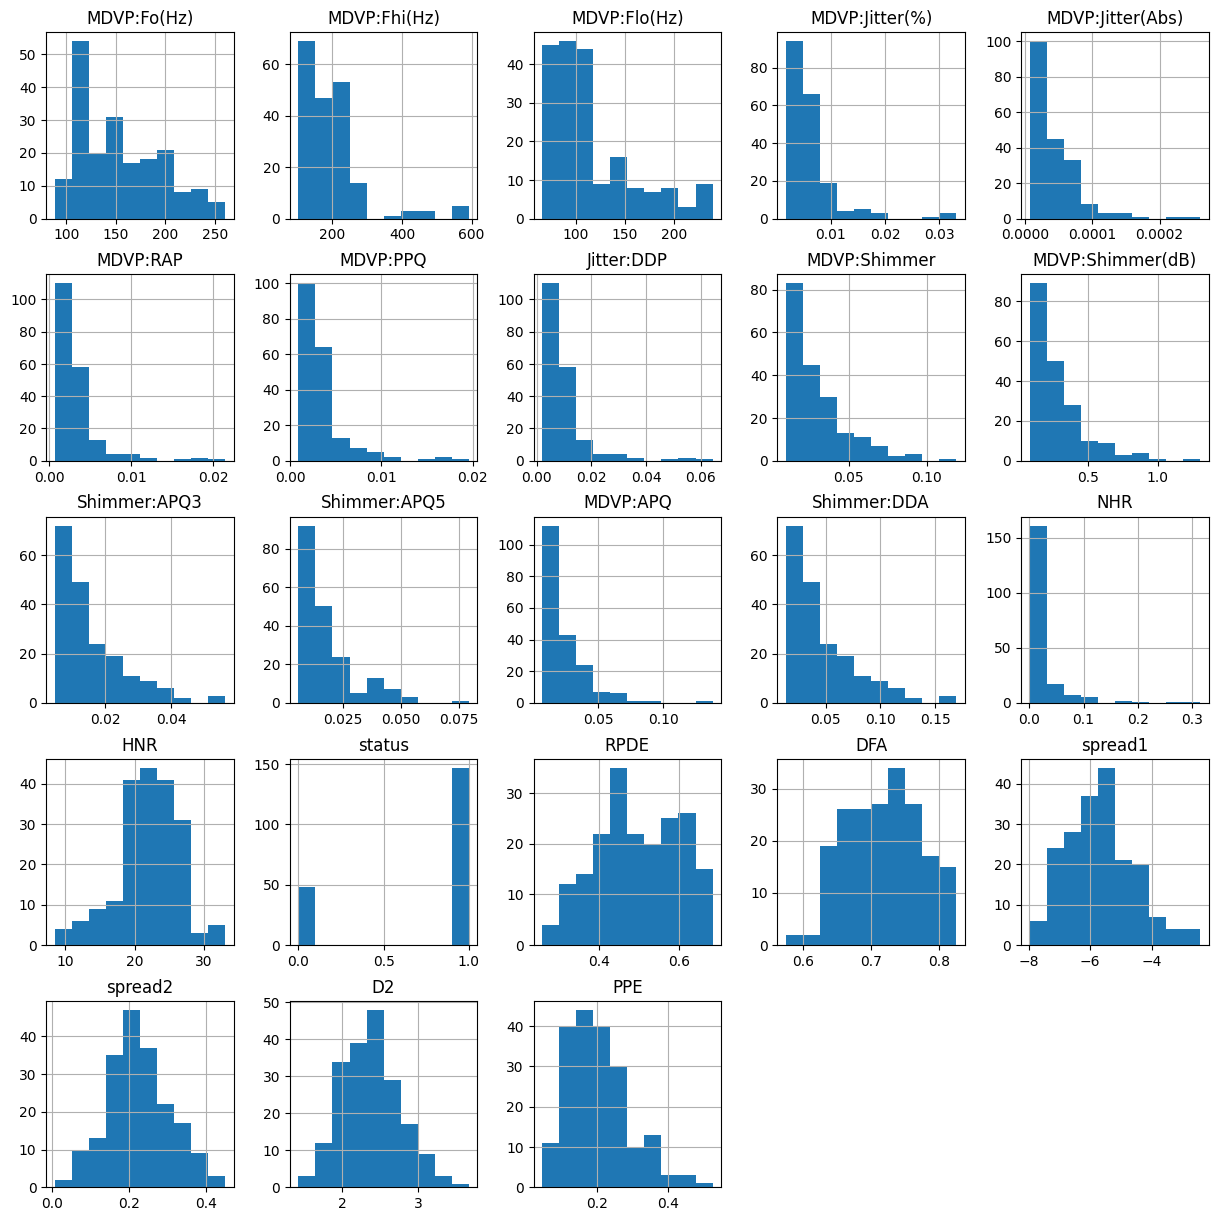

In [7]:
#Use histograms and box plots to understand the distribution of numerical features
df.hist(figsize=(15,15))
plt.show()


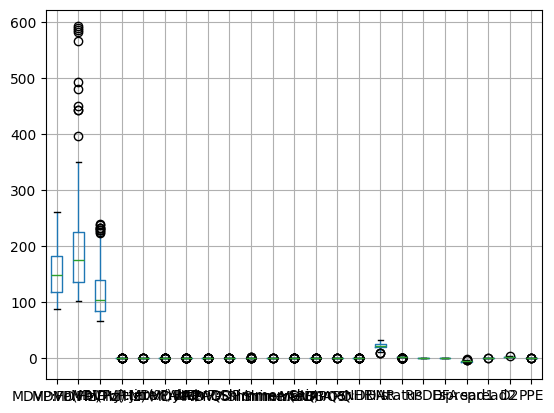

In [8]:
df.boxplot()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


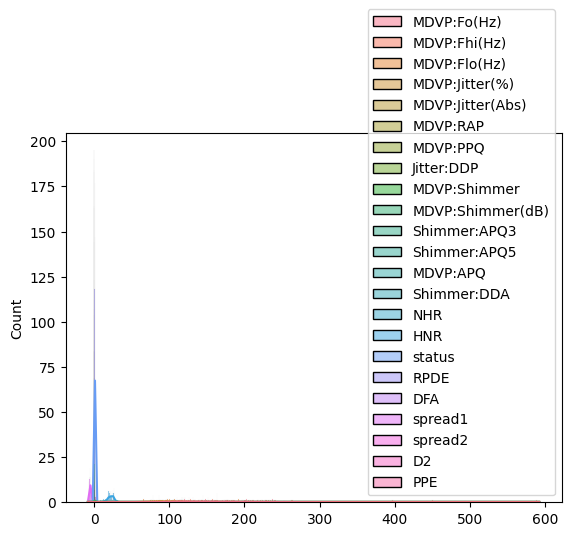

In [10]:
sns.histplot(df,kde=True,bins=100)
plt.show()

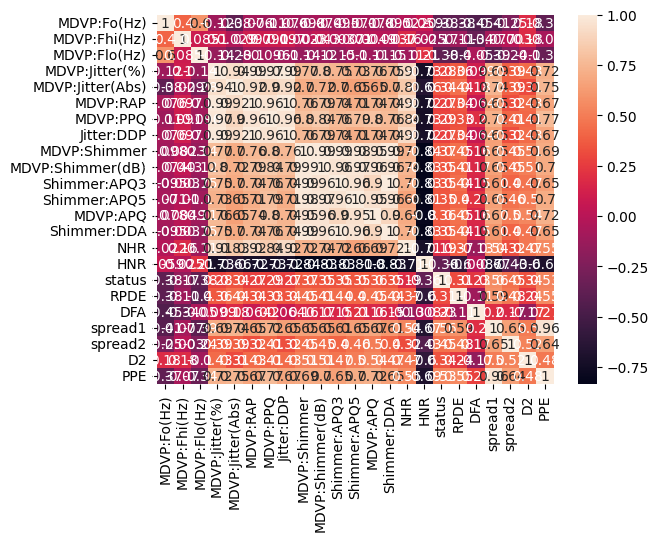

In [12]:
# Use a correlation heatmap to analyze relationships between variables
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)  # Selects columns with numerical data types
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [15]:
#label encoding all the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)


In [16]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,55,72,15,137,8,104,143,127,153,...,146,130,75,1,44,183,154,139,84,163
1,1,65,66,128,150,9,126,148,150,172,...,170,124,46,1,73,190,180,172,126,183
2,2,43,38,123,155,10,135,152,160,162,...,165,96,69,1,53,194,167,162,92,174
3,3,42,52,122,153,10,131,149,155,166,...,168,100,68,1,58,189,178,170,105,184
4,4,36,61,120,158,12,140,154,165,174,...,176,109,56,1,46,192,184,110,91,188


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   name              195 non-null    int64
 1   MDVP:Fo(Hz)       195 non-null    int64
 2   MDVP:Fhi(Hz)      195 non-null    int64
 3   MDVP:Flo(Hz)      195 non-null    int64
 4   MDVP:Jitter(%)    195 non-null    int64
 5   MDVP:Jitter(Abs)  195 non-null    int64
 6   MDVP:RAP          195 non-null    int64
 7   MDVP:PPQ          195 non-null    int64
 8   Jitter:DDP        195 non-null    int64
 9   MDVP:Shimmer      195 non-null    int64
 10  MDVP:Shimmer(dB)  195 non-null    int64
 11  Shimmer:APQ3      195 non-null    int64
 12  Shimmer:APQ5      195 non-null    int64
 13  MDVP:APQ          195 non-null    int64
 14  Shimmer:DDA       195 non-null    int64
 15  NHR               195 non-null    int64
 16  HNR               195 non-null    int64
 17  status            195 non-null    i

In [18]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [19]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,55,72,15,137,8,104,143,127,153,...,146,130,75,1,44,183,154,139,84,163
1,1,65,66,128,150,9,126,148,150,172,...,170,124,46,1,73,190,180,172,126,183
2,2,43,38,123,155,10,135,152,160,162,...,165,96,69,1,53,194,167,162,92,174
3,3,42,52,122,153,10,131,149,155,166,...,168,100,68,1,58,189,178,170,105,184
4,4,36,61,120,158,12,140,154,165,174,...,176,109,56,1,46,192,184,110,91,188


In [20]:
#training the data and applying svm ,confusion matrix, recall, F1 score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
confusion_matrix=pd.crosstab(y_test,y_pred)
print('confusion matrix:\n',confusion_matrix)
from sklearn.metrics import recall_score,f1_score
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('recall:',recall)
print('f1 score:',f1)


accuracy: 0.8974358974358975
confusion matrix:
 col_0   0   1
status       
0       5   2
1       2  30
recall: 0.9375
f1 score: 0.9375


In [21]:
#training the data and applying svm ,confusion matrix, recall, F1 score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm=SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
confusion_matrix=pd.crosstab(y_test,y_pred)
print('confusion matrix:\n',confusion_matrix)
from sklearn.metrics import recall_score,f1_score
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('recall:',recall)
print('f1 score:',f1)


accuracy: 0.9230769230769231
confusion matrix:
 col_0   0   1
status       
0       4   3
1       0  32
recall: 1.0
f1 score: 0.9552238805970149


In [22]:
#training the data and applying svm ,confusion matrix, recall, F1 score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm=SVC(kernel='poly')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
confusion_matrix=pd.crosstab(y_test,y_pred)
print('confusion matrix:\n',confusion_matrix)
from sklearn.metrics import recall_score,f1_score
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('recall:',recall)
print('f1 score:',f1)


accuracy: 0.9487179487179487
confusion matrix:
 col_0   0   1
status       
0       6   1
1       1  31
recall: 0.96875
f1 score: 0.96875


In [23]:
#training the data and applying svm ,confusion matrix, recall, F1 score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm=SVC(kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
confusion_matrix=pd.crosstab(y_test,y_pred)
print('confusion matrix:\n',confusion_matrix)
from sklearn.metrics import recall_score,f1_score
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('recall:',recall)
print('f1 score:',f1)


accuracy: 0.8205128205128205
confusion matrix:
 col_0    1
status    
0        7
1       32
recall: 1.0
f1 score: 0.9014084507042254


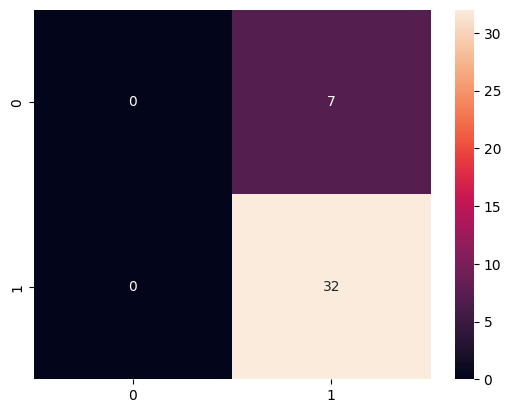

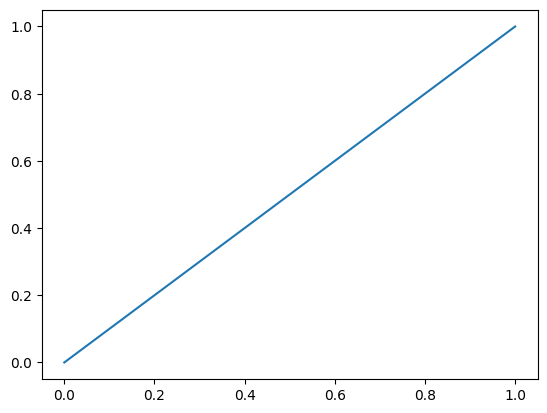

AUC score: 0.5


In [25]:
#Visualize the Confusion Matrix and ROC Curve.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure
sns.heatmap(confusion_matrix, annot=True)
plt.show()
roc_curve = roc_curve(y_test, y_pred)
roc_auc = auc(roc_curve[0], roc_curve[1])
plt.plot(roc_curve[0], roc_curve[1], label='ROC curve (area = %0.2f)' % roc_auc)
plt.show()
auc_score = auc(roc_curve[0], roc_curve[1])
print('AUC score:', auc_score)
